### 1. 앙상블 학습

#### 앙상블 학습개요

* 앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(classifirer)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종예측을 도출하는 기법이다.
* 어려운 문제의 결론을 내기 위해 여러 명의 전문가로 위원회를 구성해 다양한 의견을 수렴하고 결정하듯이 앙상블 학습의 목표는 다양한 분류기의 에측 결과를 결합함으로써 단일 분류기 보다 신뢰성이 높은 예측값을 얻는것.

#### 앙상블의 유형
* 앙상블 유형은 일반적으로 보팅(voting), 배깅(bagging), 부스팅(boosting)으로 구분 할 수 있으며, 이외에 스태킹(stacking)등의 기법이 있다.
* 대표적인 배깅(bagging)은 랜덤 포레스트(random forest)알고리즘이 있으며 
* 부스팅(boosting)은 그래디언트 부스팅, XGBoost, LightGBM 등이 있다.
    * Gradient boosting(XGBoost, LightGBM, Catboost)
* 넓은 의미로는 설 다른 모델을 결합한 것들을 앙상블로 지칭하기도 한다.

#### 앙상블의 특징
* 단일 모델의 약점을 다수의 모델들을 결합하여 보완.
* 뛰어난 성능을 가진 모델들로만 구성하는 것 보다 성능이 떨어지더라도 서로 다른 유형의 모델을 섞는 것이 오히려 전체 성능이 도움이 될 수 있음.
* 랜덤 포레스트 및 뛰어난 부스팅 알고리즘들은 모두 결정트리 알고리즘을 기반 알고리즘으로 적용함.
* 결정트리의 단점인 과적합을 수십~수천개의 많은 분류기를 결합해 보완하고 장점인 직관적인 분류 기준은 강화됨. 

#### 보팅(Voting)과 배깅(Bagging)의 개요
* 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이다.
* 보팅과 배깅의 다른점은 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는것이고
* 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행 하는 것이다.

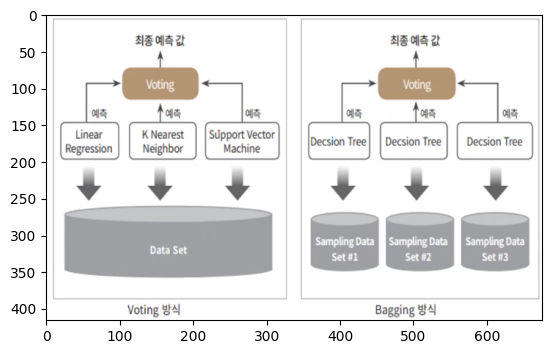

In [7]:
import matplotlib.image as img
import matplotlib.pyplot as pp

fileName = "sample6.png"
ndarray = img.imread(fileName)
pp.imshow(ndarray)
pp.show()

#### 보팅(Voting)의 유형 - hard voting, soft voting
* hard voting: 다수의 classifier 간 다수결로 최종 class 결정
* soft voting: 다수의 classifier들의 class 확률을 평균하여 결정


* 일반적으로 하드 보팅 보다는 소프트 보팅이 예측성능이 상대적으로 우수하여 주로 사용됨.
* 사이킷런은 VotingClassifier 클래스를 통해 보팅(Voting)을 지원.

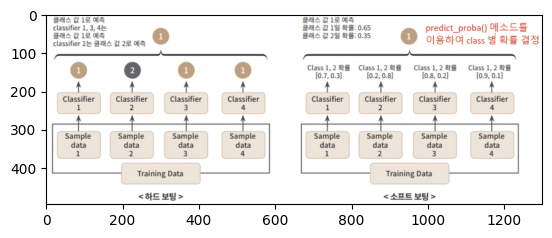

In [8]:
import matplotlib.image as img
import matplotlib.pyplot as pp

fileName = "sample7.png"
ndarray = img.imread(fileName)
pp.imshow(ndarray)
pp.show()

#### Voting Classifier
위스콘신 유방암 데이터 로드

In [9]:

import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


#### VotingClassifier로 개별 모델은 로지스틱회귀와 KNN을 보팅방식으로 결합하고 성능비교

In [10]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


#### 배깅(Bagging) - 랜덤 포레스트(Random Forest)
* 배깅의 대표적인 알고리즘은 랜덤 포레스트이다.
* 랜덤포레스트는 다재 다능한 알고리즘. 앙상블 알고리즘중 비교적 빠른 수행속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능을 보이고 있음.

* 랜덤 포레스트는 여러개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 된다.

#### 랜덤포레스트의 부트스트래핑 분할
* 랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정트리이지만, 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트이다. 
* 이렇게 여러개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrapping) 분할 방식이라고 한다 (그래서 배깅이 bootstrap aggregating의 줄임말이다).
* 원본 데이터의 건수가 10개인 학습 데이터 세트에서 랜덤 포레스트를 3개의 결정 트리 기반으로 학습하려고 n_estimators=3으로 하이퍼 파라미터를 부여하면 다음과 같이 데이터 서브세트가 만들어짐.

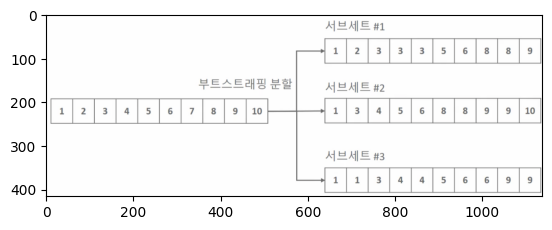

In [11]:
import matplotlib.image as img
import matplotlib.pyplot as pp

fileName = "sample8.png"
ndarray = img.imread(fileName)
pp.imshow(ndarray)
pp.show()

#### 사이킷런 랜덤 포레스트 하이퍼파라미터
* 사이킷런은 랜덤 포레스트 분류를 이해 RandomForestClassifier 클래스를 제공한다.


* n_estimator: 랜덤 포레스트에서 결정트리 개수를 지정함. 디폴트는 100개. 많이 설정할 수록 좋은 성능을 기대할수있지만, 계속 증가한다고 성능이 무조건 향상되는것도 아님. 또한 늘릴수록 학습 수행시간이 오래 걸리는 것도 감안.
* max_features: 결정 트리에 사용된 max_features 파라미터와 같다.
* max_depth나 min_samples_leaf와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤포레스트에도 똑같이 적용될 수 있다.

#### Random Forest

In [12]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9196


In [18]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8,16,24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# n_jobs=-1 : 모든 cpu 프로세서 사용
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


In [22]:
rf_clf1 = RandomForestClassifier(n_estimators=100,  min_samples_leaf=6, max_depth=16,
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9260


In [28]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_importances.sort_values(ascending=False)[:20]

angle(X,gravityMean)               0.035312
tGravityAcc-mean()-Y               0.033729
tGravityAcc-min()-X                0.030276
angle(Y,gravityMean)               0.029013
tGravityAcc-max()-X                0.027538
tGravityAcc-mean()-X               0.024708
tGravityAcc-energy()-X             0.024389
tGravityAcc-min()-Y                0.023339
tGravityAcc-max()-Y                0.021011
fBodyAccJerk-bandsEnergy()-1,8     0.018636
tGravityAcc-energy()-Y             0.015461
tBodyAcc-max()-X                   0.013750
tBodyAccJerk-entropy()-X           0.013433
tGravityAcc-arCoeff()-Z,1          0.013150
tGravityAcc-max()-Z                0.013125
fBodyAccMag-energy()               0.012262
tGravityAcc-energy()-Z             0.010683
fBodyAccJerk-bandsEnergy()-1,16    0.010095
fBodyAcc-mad()-X                   0.010036
angle(Z,gravityMean)               0.009483
dtype: float64

/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/model_selection/_validation

/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/model_selection/_validation

/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/pmstudy/lib/python3.7/site-packages/sklearn/model_selection/_validation

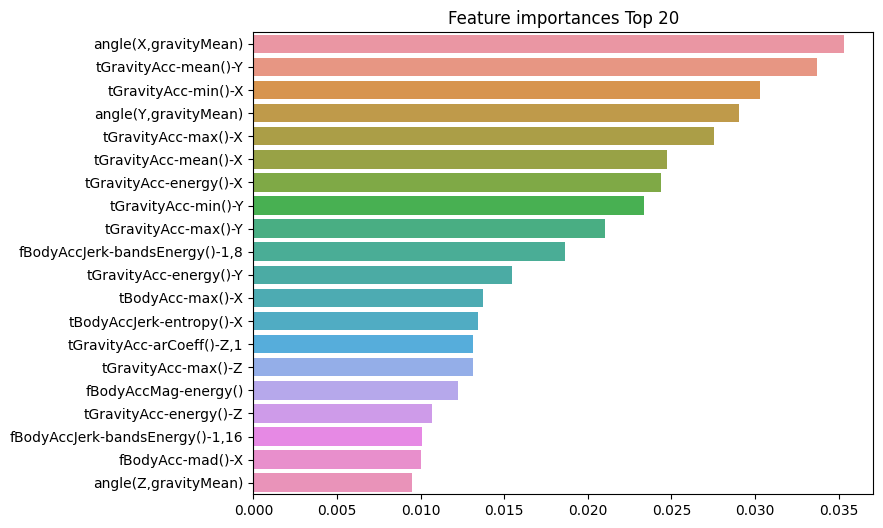

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [41]:
##중복된 피처명을 수정하는 get_new_feature_name_df() 이해를위해

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    #pd.set_option('display.max_rows',None)
    
    print(feature_dup_df)
    feature_dup_df = feature_dup_df.reset_index()
    print(feature_dup_df)
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    print(new_feature_name_df)
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    print(new_feature_name_df)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    print(new_feature_name_df)
    return new_feature_name_df


feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                    header=None,names=['column_index','column_name'])
    
# 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
new_feature_name_df = get_new_feature_name_df(feature_name_df)



     dup_cnt
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
30         0
31         0
32         0
33         0
34         0
35         0
36         0
37         0
38         0
39         0
40         0
41         0
42         0
43         0
44         0
45         0
46         0
47         0
48         0
49         0
50         0
51         0
52         0
53         0
54         0
55         0
56         0
57         0
58         0
59         0
60         0
61         0
62         0
63         0
64         0
65         0
66         0
67         0
68         0
69         0
70         0
71         0
72         0
73         0
74         0
75         0

#### 부스팅(Boosting)

* 부스팅 알고리즘은 여러개의 약한 학습기(weak learner)를 순차적으로 학습-예측 하면서 잘못 예측한 데이터나 학습트리에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식.
* 부스팅의 대표적인 구현은 AdaBoost(Adaptive boosting)와 GBM(Gradient Boost Machine)가 있다.
* 앞선 배깅방식의 랜덤포레스트는 독립적으로 학습기들이 병렬적으로 학습되었음. 하지만 부스팅은 순차적으로 학습하고 한번 학습이 끝난 후 결과에 따라 가중치를 부여하고 부여된 가중치가 다음 모델의 결과 예측에 영향을 준다.


* 배깅은 여러개의 모델이 독립적이다. 여러개이 모델을 만들지만 이 과정에서 각각의 모델들은 서로의 영향을 받지 않는다(독립적으로 결과 예측하여 그 결과 값을 집계하여 최종 결과 값을 예측하는 방식). 여러개의 모델을 만들기 이해 각 모델별로 임의의 데이터 세트를 생성하는데 이때 생성되는 데이터 세트는 기존 데이터 세트에서 중복을 허용한 채로 무작위 N개를 선택하여 데이터를 생성함(Bootstap).
* 부스팅은 모델간의 팀워크가 이루어짐. 처음 모델이 예측하면 그 결과에 따라서 데이터에 가중치가 부여되고, 부여된 가중치는 다음 모델에 영향을 준다. 잘못 분류된 데이터에 집중하여 새로운 분류 규칙을 만드는 단계를 반복한다. 



* (1) AdaBoost(Adaptive boosting) : 각각의 분류기의 기준선(서로다른 가중치)을 결합한 예측
* (2) GBM(Gradient Boost Machine)도 에이다 부스트와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Descent: 반복 수행을 통해 오류를 최소화 할 수 있도록 가중치의 업데이트 값을 도출하는 기법)을 이용하는 것이 차이다. 이전 모델의 오차를 보완하는 방향으로 만들어짐.
    
    
* 사이킷런은 GBM 분류를 위해 GradientBoostingClassifier 클래스를 제공한다. 
    * loss: 경사하강법에서 사용할 로스함수 지정.
    * learning_rate
        * GBM이 학습을 진행할때마다 적용하는 학습율(0~1). 
        * 너무 작은 값을 적용하면 업데이트 되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 있다. 
        * 하지만 많은 weak learner는 순차적인 반복이 필요해서 수행시간이 오래걸리고 또한 너무 작은 값을 적용하면 모든 weak learner이 반복이 완료되어도 최소 오류값을 찾지 못할 수도 있다. 
        * 반대로 큰값을 적용하면 최소 오류값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높지만, 빠른 수행이 가능하다.
    * n_estimators: weak leaner의 개수. 
         * weak learner가 순차적으로 오류를 보정하므로 개수가 많을 수록 예측 성능이 일정 수준까지는 좋아질 수 있다. 
         * 하지만 개수가 많을수록 수행 시간이 오래 걸린다.
    * subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율.
         * 기본값은 1, 이는 전체 학습 데이터를 기반으로 학습한다는 의미.
         * 과적합이 염려되는 경우 subsample을 1보다 작은값으로 설정.
     
    
    
    

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

     dup_cnt
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
30         0
31         0
32         0
33         0
34         0
35         0
36         0
37         0
38         0
39         0
40         0
41         0
42         0
43         0
44         0
45         0
46         0
47         0
48         0
49         0
50         0
51         0
52         0
53         0
54         0
55         0
56         0
57         0
58         0
59         0
60         0
61         0
62         0
63         0
64         0
65         0
66         0
67         0
68         0
69         0
70         0
71         0
72         0
73         0
74         0
75         0

GBM 정확도: 0.9393
GBM 수행 시간: 572.4 초 


In [43]:
### 아래는 강의에서 설명드리지는 않지만 GridSearchCV로 GBM의 하이퍼 파라미터 튜닝을 수행하는 예제 입니다. 
### 사이킷런이 1.X로 업그레이드 되며서 GBM의 학습 속도가 현저하게 저하되는 문제가 오히려 발생합니다. 
### 아래는 수행 시간이 오래 걸리므로 참고용으로만 사용하시면 좋을 것 같습니다. 

#from sklearn.model_selection import GridSearchCV

#params = {
#    'n_estimators':[100, 500],
#    'learning_rate' : [ 0.05, 0.1]
#}
#grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
#grid_cv.fit(X_train , y_train)
#print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
#print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))